In [2]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [3]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and

In [92]:
# 3
datagen = ImageDataGenerator(rescale=1./255.)

train_image_generator = ImageDataGenerator(rescale=1./255., validation_split = 0.25)
validation_image_generator = ImageDataGenerator(rescale=1./255., validation_split = 0.25)
test_image_generator = ImageDataGenerator(rescale=1./255., validation_split = 0.25)

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=validation_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=test_dir,
                                                         classes=['.'],
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode=None,
                                                     shuffle=False)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


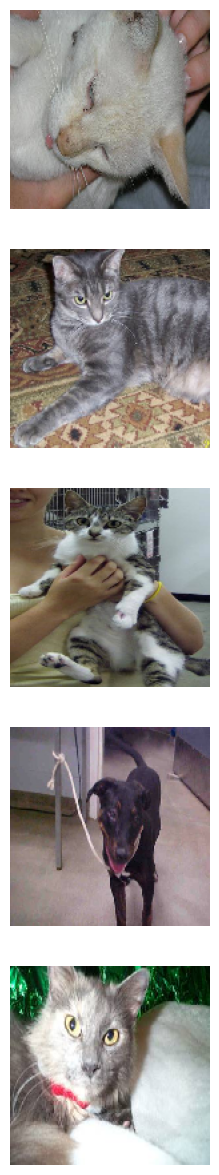

In [93]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [165]:
# 5
train_image_generator = ImageDataGenerator(
rotation_range=100, width_shift_range=0.2,
    height_shift_range=0.3, zoom_range=0.1, horizontal_flip=True,
    vertical_flip=True, rescale=1./255)

# Note that the validation data should not be augmented
validation_image_generator = ImageDataGenerator(rescale=1./255., validation_split = 0.25)


Found 2000 images belonging to 2 classes.


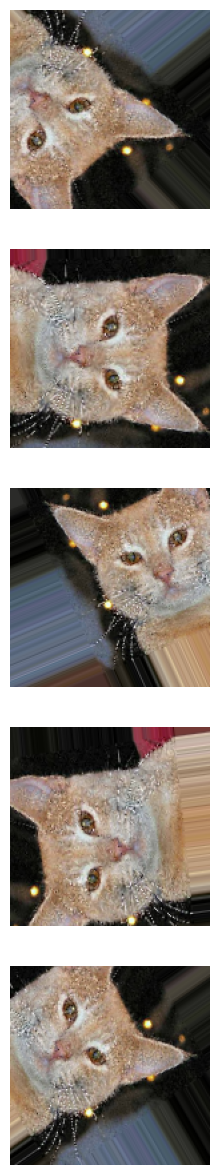

In [166]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [167]:
# 7

model = Sequential()

model.add(Conv2D(16, (3,3), padding='same', kernel_initializer='he_uniform', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32, (3,3), padding='same',  kernel_initializer='he_uniform', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)))

model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), padding='same', kernel_initializer='he_uniform', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), padding='same', kernel_initializer='he_uniform', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)))
model.add(MaxPooling2D((2,2)))


model.add(Conv2D(256, (3,3), padding='same', kernel_initializer='he_uniform', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(400, (3,3), padding='same', kernel_initializer='he_uniform', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)))

model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(1000, activation='relu', kernel_initializer='he_uniform'))

model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])


model.summary()



Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_148 (Conv2D)                  │ (None, 150, 150, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_116 (MaxPooling2D)     │ (None, 75, 75, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_149 (Conv2D)                  │ (None, 75, 75, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_117 (MaxPooling2D)     │ (None, 37, 37, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_150 (Conv2D)                  │ (None, 37, 37, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_118 (MaxPooling2D)     │ (None, 18, 18, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_151 (Conv2D)                  │ (None, 18, 18, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_119 (MaxPooling2D)     │ (None, 9, 9, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_152 (Conv2D)                  │ (None, 9, 9, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_120 (MaxPooling2D)     │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_153 (Conv2D)                  │ (None, 4, 4, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_121 (MaxPooling2D)     │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_38 (Flatten)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_86 (Dense)                     │ (None, 1000)                │         513,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_87 (Dense)                     │ (None, 128)                 │         128,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_88 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 923,209 (3.52 MB)

 Trainable params: 923,209 (3.52 MB)

 Non-trainable params: 0 (0.00 B)

In [168]:

history = model.fit(x=train_data_gen, epochs=epochs, validation_data=val_data_gen)

Epoch 1/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 750ms/step - accuracy: 0.5085 - loss: 3.8654 - val_accuracy: 0.5010 - val_loss: 0.7949
Epoch 2/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 607ms/step - accuracy: 0.5229 - loss: 0.7134 - val_accuracy: 0.5360 - val_loss: 0.6893
Epoch 3/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 751ms/step - accuracy: 0.5692 - loss: 0.6772 - val_accuracy: 0.5100 - val_loss: 0.7354
Epoch 4/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 527ms/step - accuracy: 0.5510 - loss: 0.6830 - val_accuracy: 0.5840 - val_loss: 0.6624
Epoch 5/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 612ms/step - accuracy: 0.5757 - loss: 0.6629 - val_accuracy: 0.6080 - val_loss: 0.6475
Epoch 6/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 584ms/step - accuracy: 0.5972 - loss: 0.6617 - val_accuracy: 0.5620 - val_loss: 0.6658
Epoch 7/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 529ms/step - accuracy: 0.5890 - loss: 0.6511 - val_accuracy: 0.6040 - val_loss: 0.6439
Epoch 8/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 719ms/step - accuracy: 0.6180 - loss: 0.6489 - val_accu

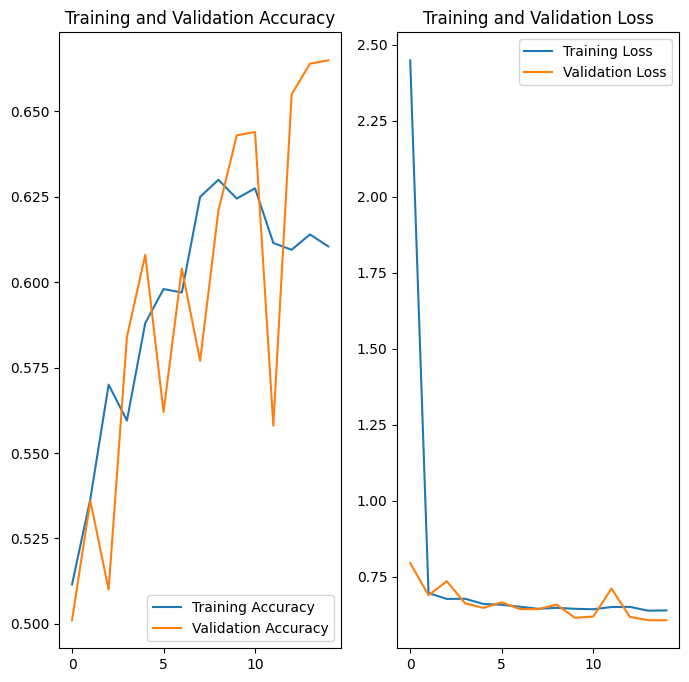

In [169]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [170]:
#get the probability that each test image is a dog/cat
probabilities = [int(boolean) for boolean in model.predict(test_data_gen) > 0.5]
print(probabilities)



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 685ms/step
[0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]


<ipython-input-170-525a7d949f08>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  probabilities = [int(boolean) for boolean in model.predict(test_data_gen) > 0.5]


In [171]:
probabilities = model.predict(test_data_gen)
print(probabilities)
#convert to 0 or 1
probabilities = [int(boolean) for boolean in probabilities > 0.5]
print(probabilities)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
[[0.41135857]
 [0.14570586]
 [0.19312228]
 [0.7399052 ]
 [0.1933825 ]
 [0.42527875]
 [0.6071057 ]
 [0.2440486 ]
 [0.7296933 ]
 [0.73075205]
 [0.37559637]
 [0.5717232 ]
 [0.4586465 ]
 [0.17932446]
 [0.47763065]
 [0.22465518]
 [0.36177328]
 [0.42149222]
 [0.65392107]
 [0.42925608]
 [0.33875117]
 [0.6249203 ]
 [0.28661323]
 [0.5221137 ]
 [0.33391035]
 [0.60599256]
 [0.8500453 ]
 [0.22380613]
 [0.35475945]
 [0.35270795]
 [0.50439215]
 [0.36649862]
 [0.72885036]
 [0.99360996]
 [0.1682916 ]
 [0.24802394]
 [0.9140121 ]
 [0.60807616]
 [0.405252  ]
 [0.43026718]
 [0.3914963 ]
 [0.23649275]
 [0.5115398 ]
 [0.3701681 ]
 [0.31505147]
 [0.38276127]
 [0.25921497]
 [0.3512104 ]
 [0.27749664]
 [0.24195726]]
[0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]


<ipython-input-171-a87885e8efa2>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  probabilities = [int(boolean) for boolean in probabilities > 0.5]


In [172]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 72.0% of the images of cats and dogs.
You passed the challenge!
